In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from subprocess import check_output

In [6]:
btc =pd.read_csv("C:/Users/manoj/Desktop/project/coinbase.csv")
btc.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


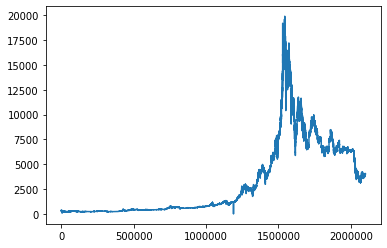

In [7]:
btc[btc.columns.values] = btc[btc.columns.values].ffill()

btc['Open'].plot()

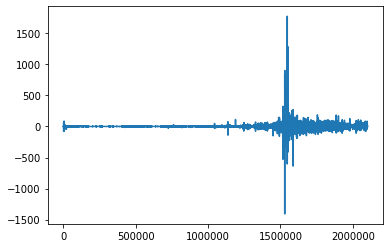

In [8]:
btc['Delta'] = btc['Close'] - btc['Open']

btc['Delta'].plot(kind='line')


In [9]:
btc[abs(btc['Delta']) >= 100]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Delta
1137776,1489179780,1224.98,1225.00,1085.00,1085.00,1041.413142,1.189129e+06,1141.842040,-139.98
1189737,1492297440,1070.00,1181.95,975.00,1181.95,12.337065,1.321239e+04,1070.950887,111.95
1449160,1507862820,5850.96,5850.96,5685.00,5699.92,414.289421,2.394037e+06,5778.659110,-151.04
1478471,1509621480,7332.52,7332.53,7216.50,7216.50,88.778404,6.462688e+05,7279.571722,-116.02
1478477,1509621840,7148.30,7170.72,7002.12,7033.09,146.906201,1.040698e+06,7084.096405,-115.21
...,...,...,...,...,...,...,...,...,...
1926203,1536485400,6242.51,6360.51,6242.50,6351.50,309.875638,1.951396e+06,6297.351306,108.99
1977837,1539583440,6493.77,6620.00,6493.77,6620.00,622.923052,4.096272e+06,6575.887712,126.23
2021675,1542213720,5757.67,5769.60,5649.01,5649.02,219.537039,1.254103e+06,5712.490325,-108.65
2037175,1543143720,3779.10,3899.00,3779.10,3885.95,286.319029,1.096338e+06,3829.079195,106.85


In [10]:
def digitize(n):
    if n > 0:
        return 1
    return 0
    
btc['to_predict'] = btc['Delta'].apply(lambda d: digitize(d))
btc.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Delta,to_predict
2099755,1546898520,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309,0.00,0
2099756,1546898580,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083169,4006.017233,0.00,0
2099757,1546898640,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635,0.00,0
2099758,1546898700,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991,-0.51,0
2099759,1546898760,4005.51,4006.01,4005.51,4005.99,1.752778,7021.183546,4005.745614,0.48,1


In [11]:
btc_mat =btc.to_numpy()

In [12]:
def rolling_window(a, window):

    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)


WINDOW_SIZE = 22

In [16]:
X =rolling_window(btc_mat[:,8], WINDOW_SIZE)[:-1,:]

In [17]:
btc['Delta'].tail(10)

2099750   -2.53
2099751   -3.51
2099752    3.08
2099753    0.00
2099754   -0.56
2099755    0.00
2099756    0.00
2099757    0.00
2099758   -0.51
2099759    0.48
Name: Delta, dtype: float64

In [18]:
print("{0}\n\nShape: {1}".format(X, X.shape))

[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [-0.01 -0.01 -1.16 ... -0.56  0.    0.  ]
 [-0.01 -1.16  3.4  ...  0.    0.    0.  ]
 [-1.16  3.4  -3.15 ...  0.    0.   -0.51]]

Shape: (2099738, 22)


In [21]:
Y = btc['to_predict'].to_numpy()[WINDOW_SIZE:]
print("{0}\n\nShape: {1}".format(Y, Y.shape))

[0 0 0 ... 0 0 1]

Shape: (2099738,)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4284, stratify=Y)

In [24]:
y_test[:100]

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [25]:
clf =RandomForestClassifier(random_state=4284, n_estimators=50)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=4284,
                       verbose=0, warm_start=False)

In [35]:
predicted=clf.predict(X_test)

In [36]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.64      0.81      0.71    313049
           1       0.53      0.31      0.39    211886

    accuracy                           0.61    524935
   macro avg       0.58      0.56      0.55    524935
weighted avg       0.59      0.61      0.58    524935



In [37]:
conf_mat = confusion_matrix(y_test, predicted)

# Confusion matrix in percentages
pct_conf_mat = conf_mat/np.sum(conf_mat) * 100

print("Pred:  0\t\t1\n{}".format(pct_conf_mat))

Pred:  0		1
[[48.22844733 11.4073171 ]
 [27.6620915  12.70214407]]


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel=LogisticRegression()

In [42]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
prediction=logmodel.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(y_test,prediction)

array([[312479,    570],
       [211122,    764]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test,prediction)

0.5967272138455237